# Code to Run OT2  Color Mixing 
by XX;

Modified on Nov 17, 2020 by Liu Zhe for OT2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import utils
import ssh_command as ssh
import image_process as imp
import gpyopt_optimizer as gpyopt

### A "Fake" RGB function

In [3]:
def RGB_func(X): 
    '''
    This is the 'fake' function to genration RGB from the x_A, x_B, x_C
    Please replace this function with the actual experimental data
    x is normalized. 
    '''
    X = np.array(X)
    RGB = X.dot(np.array([[1,0.2,0.0],[0.0,0.8,0.1],[0.3,0.0,1]]))
    return np.around(RGB*255+0.01* np.random.randn(*RGB.shape)*255)

### The Four Required Blocks

In [4]:
def xinit():
    X_init = 

    return np.array(X_init)

In [5]:
def Ymetric (RGB_exp, RGB_ref):
    
    
    Y = 
    
    return np.array(Y)


In [9]:
def xnext(X, Y, i):

    X_new = 
    
    return np.array(X_new)

In [10]:
def stop_cond(RGB_exp, RGB_ref):
    stop_flag = False
    if len(RGB_exp)>25:
        print('Reach the max number of samples')
        stop_flag = True
        
    def color_difference(rgb, rgb_ref):
        return abs(rgb_ref[0]-rgb[0]), abs(rgb_ref[1]-rgb[1]), abs(rgb_ref[2]-rgb[2])
    diff = []
    for rgb in RGB_exp:
        rgb_ref = RGB_ref[0]
        r_err, g_err, b_err = color_difference(rgb, rgb_ref)
        diff.append((r_err<=8) & (g_err<=8) & (b_err<=8))
    if np.sum(diff)>=1:
        print("Success! Early stop after collecting", len(diff), "samples")
        print("Good match at ", np.arange(len(diff))[np.array(diff) == 1][0]+1)
        stop_flag = True 
          
    return stop_flag

In [11]:
import numpy as np

flag = False
############### TASK 1: Initial Conditions ###################
X_init = xinit()
###############################################################

##******************Check the X_init format****************#
for x in np.array(X_init):
    if len(x) != 3:
        print('ERROR! each row needs to be 3 elements for color A, B and C')
        print('you have', len(x), ' elements in one of the rows')
        flag = True
    if abs(sum(x)-200)> 0.01*200:
        print('ERROR! each row needs to sum up closed to 200 (or 198 - 200) [uL]')
        print('you have a sum of', sum(x), ' [uL] in one of the rows')
        flag = True
##*********************************************************#

if flag != True:
    X_new = np.array(X_init)
    X = []

    num_rounds = 25-len(X_init)
    for i in range(num_rounds):
        if X ==[]:
            X = X_new/200
        else:
            X = np.concatenate([X, X_new/200])
            if len(X)>25:
                X = X[0:25]

        RGB_ref = [np.array([ 83., 108.,  76.])+0.01* np.random.randn(3)*255] # each value is in the range 0-255
        RGB_exp = np.array(RGB_func(X))
        

#######TASK 2: Optimization Metric (e.g. error function)############
        Y = np.array(Ymetric(RGB_exp, RGB_ref))
####################################################################

##******************Check the Y format****************##
        if len(np.shape(Y))==2:
            if np.shape(Y)[1] != 1:
                print('we need a two dimensional array with 1 element at each row')
                print(np.shape(Y)[1])
                flag == True
        else:
            print('we need a two dimensional array with 1 element at each row')
            flag == True
        if flag == True:
            break 
##*********************************************************#



#######TASK 3: Suggest New Conditions############
        X_new = np.array(xnext(X, Y, i))
####################################################################

##******************Check the X_new format****************##
        for x in np.array(X_new):
            if len(x) != 3:
                print('ERROR! each row needs to be 3 elements for color A, B and C')
                print('you have', len(x), ' elements in one of the rows')
                flag = True
            if abs(sum(x)-200)> 0.01*200:
                print('ERROR! each row needs to sum up closed to 200 (or 198 - 200) [uL]')
                print('you have a sum of', sum(x), ' [uL] in one of the rows')
                flag = True
        if flag == True:
            break
##*********************************************************#


            
##############TASK 4: Early Stop Condition#########################

        stop_flag = stop_cond(RGB_exp, RGB_ref)
        if stop_flag:
            break
####################################################################

print("Lowest Error:", np.round(np.min(np.sqrt(Y))))
print("Lowest Error RGB", RGB_exp[np.argmin(np.sqrt(Y))],'at', np.argmin(np.sqrt(Y))+1)
print("Lowest ref RGB", np.around(RGB_ref[0]))



Success! Early stop after collecting 8 samples
Good match at  8
Lowest Error: 2.0
Lowest Error RGB [ 85. 116.  76.] at 8
Lowest ref RGB [ 83. 112.  72.]


### Test the connection to OT2

In [ ]:
OT2_IP = '169.254.74.32'
ssh.ssh_connect(OT2_IP)

ssh.transfer_and_simulate_protocol(OT2_IP, 'color_test.csv', 'color_mixing.py')

image_name = 'test.jpg'
ssh.ssh_take_an_image(OT2_IP, image_name)

## image processing and RGB extraction
image_ROI = imp.image_extractor(image_name)

### Run the OT2 with the code blocks

Iteration: BO_R0
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0          200            0            0           D8
1            0          200            0           D9
2            0            0          200          D10
3          100          100            0          D11
4            0          100          100          D12
5          100            0          100           E1
6          100           50           50           E2
Round 0 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0          200.0            0.0            0.0      13.0  255.0   54.0    2.0
1            0.0          200.0            0.0      10.0    0.0  202.0   27.0
2            0.0            0.0          200.0      14.0   79.0   -4.0  261.0
3          100.0          100.0            0.0       8.0  126.0  134.0   12.0
4            0.0          100.0          100.0       8.0   38.0  106.0  137.0
5          100.0            0.0    

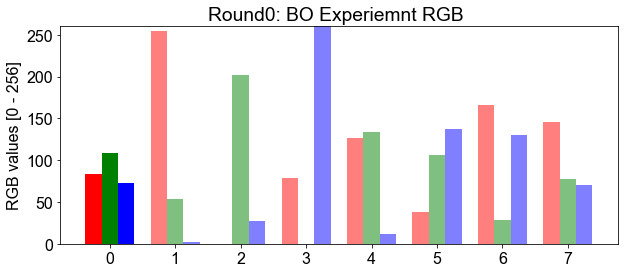

Iteration: BO_R1
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         98.0         80.0         21.0           D9
Round 1 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0          200.0            0.0            0.0      13.0  250.0   49.0   -0.0
1            0.0          200.0            0.0      10.0   -4.0  207.0   29.0
2            0.0            0.0          200.0      13.0   79.0   -2.0  253.0
3          100.0          100.0            0.0       8.0  127.0  126.0   15.0
4            0.0          100.0          100.0       8.0   34.0  103.0  142.0
5          100.0            0.0          100.0      10.0  167.0   30.0  126.0
6          100.0           50.0           50.0       9.0  151.0   74.0   72.0
7           98.0           80.0           21.0       8.0  133.0  104.0   36.0


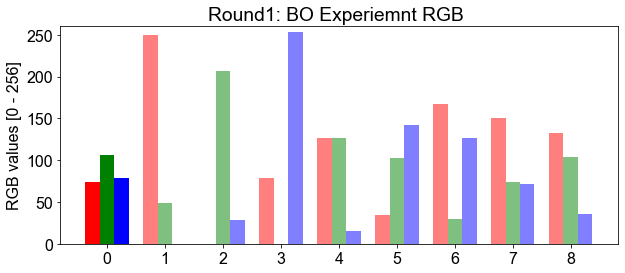

Iteration: BO_R2
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         64.0         98.0         37.0          D10
Round 2 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0          200.0            0.0            0.0      13.0  256.0   50.0   -3.0
1            0.0          200.0            0.0      10.0   -0.0  206.0   28.0
2            0.0            0.0          200.0      13.0   72.0    1.0  254.0
3          100.0          100.0            0.0       8.0  130.0  131.0   16.0
4            0.0          100.0          100.0       8.0   43.0  104.0  143.0
5          100.0            0.0          100.0       9.0  166.0   27.0  125.0
6          100.0           50.0           50.0       8.0  145.0   73.0   65.0
7           98.0           80.0           21.0       7.0  133.0  108.0   37.0
8           64.0           98.0           37.0       5.0   97.0  118.0   55.0


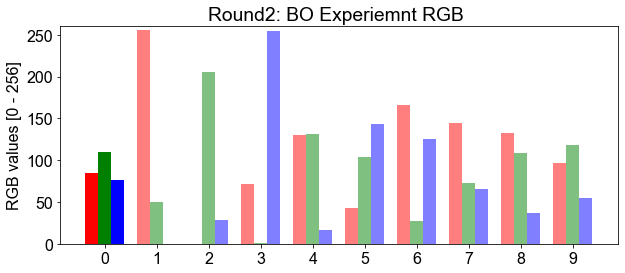

Iteration: BO_R3
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         41.0        103.0         55.0          D11
Round 3 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0          200.0            0.0            0.0      13.0  256.0   52.0   -3.0
1            0.0          200.0            0.0      10.0    1.0  204.0   23.0
2            0.0            0.0          200.0      13.0   76.0    1.0  256.0
3          100.0          100.0            0.0       8.0  129.0  130.0   16.0
4            0.0          100.0          100.0       8.0   40.0   98.0  141.0
5          100.0            0.0          100.0       9.0  163.0   32.0  127.0
6          100.0           50.0           50.0       8.0  145.0   77.0   72.0
7           98.0           80.0           21.0       7.0  136.0  109.0   32.0
8           64.0           98.0           37.0       4.0   99.0  118.0   60.0
9           41.0          103.0           55.0 

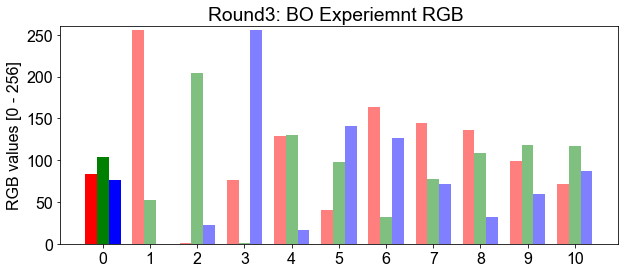

Iteration: BO_R4
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         55.0         76.0         69.0          D12
Round 4 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           200.0            0.0            0.0      13.0  253.0   55.0    0.0
1             0.0          200.0            0.0      10.0    1.0  203.0   24.0
2             0.0            0.0          200.0      13.0   77.0    4.0  258.0
3           100.0          100.0            0.0       8.0  125.0  128.0   12.0
4             0.0          100.0          100.0       8.0   42.0   96.0  142.0
5           100.0            0.0          100.0       9.0  168.0   24.0  126.0
6           100.0           50.0           50.0       8.0  150.0   71.0   70.0
7            98.0           80.0           21.0       7.0  133.0  106.0   35.0
8            64.0           98.0           37.0       4.0   98.0  120.0   61.0
9            41.0          103.0     

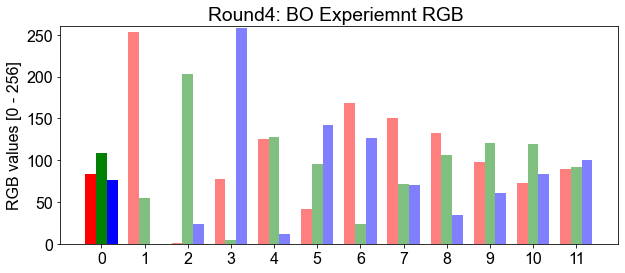

Iteration: BO_R5
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         34.0        129.0         36.0           E1
Round 5 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           200.0            0.0            0.0      13.0  254.0   49.0   -5.0
1             0.0          200.0            0.0      10.0   -1.0  202.0   26.0
2             0.0            0.0          200.0      13.0   73.0   -1.0  252.0
3           100.0          100.0            0.0       8.0  128.0  129.0   11.0
4             0.0          100.0          100.0       8.0   39.0  102.0  139.0
5           100.0            0.0          100.0       9.0  167.0   30.0  126.0
6           100.0           50.0           50.0       8.0  144.0   74.0   69.0
7            98.0           80.0           21.0       7.0  134.0  104.0   37.0
8            64.0           98.0           37.0       4.0   98.0  116.0   60.0
9            41.0          103.0     

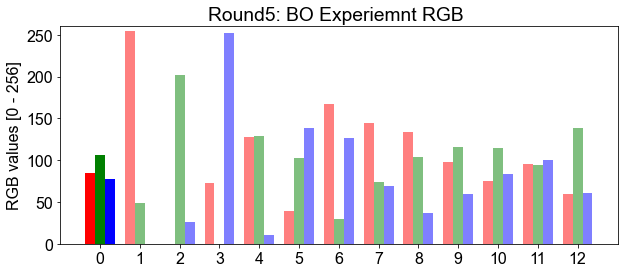

Iteration: BO_R6
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0          2.0        137.0         61.0           E2
Round 6 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           200.0            0.0            0.0      13.0  255.0   48.0    2.0
1             0.0          200.0            0.0      10.0    0.0  206.0   20.0
2             0.0            0.0          200.0      13.0   72.0   -2.0  255.0
3           100.0          100.0            0.0       8.0  125.0  125.0   16.0
4             0.0          100.0          100.0       8.0   38.0  100.0  138.0
5           100.0            0.0          100.0       9.0  169.0   24.0  129.0
6           100.0           50.0           50.0       8.0  148.0   78.0   70.0
7            98.0           80.0           21.0       7.0  130.0  108.0   37.0
8            64.0           98.0           37.0       4.0   97.0  114.0   59.0
9            41.0          103.0     

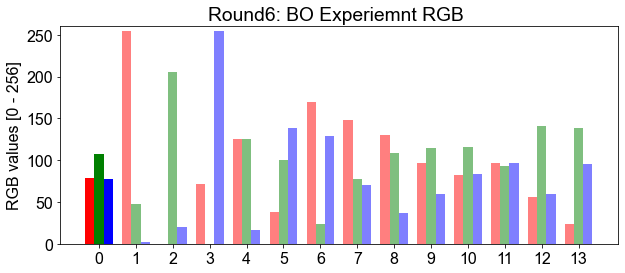

Iteration: BO_R7
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         35.0         99.0         66.0           E3
Round 7 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           200.0            0.0            0.0      13.0  257.0   52.0   -1.0
1             0.0          200.0            0.0      10.0    4.0  206.0   28.0
2             0.0            0.0          200.0      13.0   75.0    0.0  257.0
3           100.0          100.0            0.0       8.0  127.0  128.0    9.0
4             0.0          100.0          100.0       8.0   38.0  100.0  139.0
5           100.0            0.0          100.0       9.0  170.0   29.0  131.0
6           100.0           50.0           50.0       8.0  148.0   78.0   69.0
7            98.0           80.0           21.0       7.0  133.0  109.0   38.0
8            64.0           98.0           37.0       4.0  100.0  117.0   65.0
9            41.0          103.0     

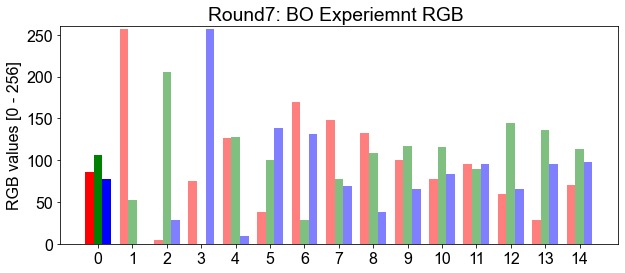

Iteration: BO_R8
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         54.0         95.0         50.0           E4
Round 8 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           200.0            0.0            0.0      13.0  254.0   49.0   -0.0
1             0.0          200.0            0.0      10.0   -1.0  202.0   30.0
2             0.0            0.0          200.0      13.0   78.0    1.0  252.0
3           100.0          100.0            0.0       8.0  130.0  127.0   14.0
4             0.0          100.0          100.0       8.0   39.0  102.0  141.0
5           100.0            0.0          100.0       9.0  164.0   25.0  128.0
6           100.0           50.0           50.0       8.0  146.0   78.0   67.0
7            98.0           80.0           21.0       7.0  132.0  109.0   44.0
8            64.0           98.0           37.0       4.0   95.0  115.0   62.0
9            41.0          103.0     

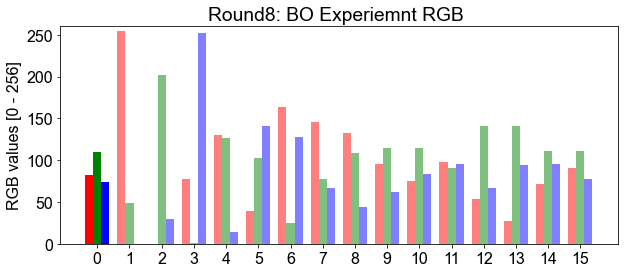

Iteration: BO_R9
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         56.0        100.0         43.0           E5
Round 9 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           200.0            0.0            0.0      13.0  257.0   55.0   -3.0
1             0.0          200.0            0.0      10.0    2.0  206.0   26.0
2             0.0            0.0          200.0      13.0   78.0   -1.0  256.0
3           100.0          100.0            0.0       8.0  125.0  127.0   10.0
4             0.0          100.0          100.0       8.0   39.0  102.0  139.0
5           100.0            0.0          100.0       9.0  167.0   23.0  136.0
6           100.0           50.0           50.0       8.0  142.0   78.0   71.0
7            98.0           80.0           21.0       8.0  137.0  107.0   36.0
8            64.0           98.0           37.0       4.0   97.0  115.0   60.0
9            41.0          103.0     

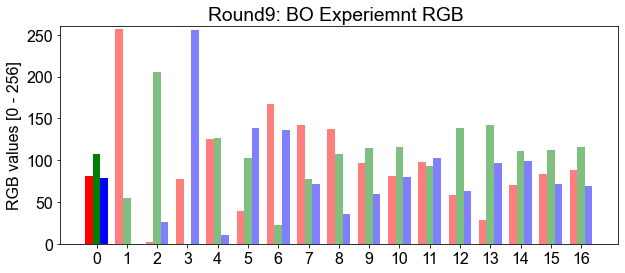

Success! Early stop after collecting 16 samples
Good match at  15
Lowest Error: 3.0
Lowest Error RGB [ 84. 112.  72.] at 15
Lowest ref RGB [ 81. 107.  79.]


In [14]:
ref_pos = 'C4'
init_pos = 'D1'

############### TASK 1: Initial Conditions ###################
X_init = xinit()
###############################################################
X_new = np.array(X_init)
X = []
num_rounds = 25-len(X_init)
for i in range(num_rounds):
    if X ==[]:
        X = X_new/200
    else:
        X = np.concatenate([X, X_new/200])
        if len(X)>25:
            X = X[0:25]
        
    ## Saving the new conditions
    header = ["colorA [uL]", "colorB [uL]", "colorC [uL]"]
    df_Xnew = pd.DataFrame(np.around(X_new), columns = header)
    dispense_pos = utils.get_dispense_positions(init_pos[0]+str(int(init_pos[1:])+len(X)), 
                                                len(X_new))
    df_Xnew['dispense pos'] = dispense_pos
    timestr = time.strftime("_%Y%m%d_%H%M%S")
    BO_csv = "BO_R"+str(i)+"_conditions_"+timestr+".csv"
    df_Xnew.to_csv('.\\data\\'+BO_csv, index=False)
    print('Iteration:',BO_csv[:5])
    print("Suggested Liquid Amount [µL]")   
    print(df_Xnew)
    ####
#     ## run the protocol on OT2
#     ssh.transfer_and_simulate_protocol(OT2_IP, BO_csv, 'color_mixing.py')
#     ssh.run_protocol(OT2_IP, 'color_mixing.py')
#     image_name = BO_csv[:-4]+timestr+'.jpg'
#     ssh.ssh_take_an_image(OT2_IP, image_name)
#     ####
    
#     ## image processing and RGB extraction
#     image_ROI = imp.image_extractor(image_name)

#     refs_pos = [ref_pos]
#     print("reference color sample")
#     rgb_ref = imp.get_rgb_from_samples(image_ROI, refs_pos)[0]
#     samples_pos = utils.get_dispense_positions(init_pos, len(X))
#     print("experiment color samples")
#     rgb_list = imp.get_rgb_from_samples(image_ROI, samples_pos)
#     RGB_ref = np.array(rgb_ref)
#     RGB_exp = np.array(rgb_list)
#     ####

    RGB_ref = [np.array([ 83., 108.,  76.])+0.01* np.random.randn(3)*255] # each value is in the range 0-255
    RGB_exp = np.array(RGB_func(X))

    #######TASK 2: Optimization Metric (e.g. error function)############
    Y = Ymetric(RGB_exp, RGB_ref)
    ####################################################################
    
    ## Data Processing and Saving 
    df_X= pd.DataFrame(np.append(np.around(np.append(X*200, np.sqrt(Y), axis=1),0),
                                    np.around(RGB_exp,0), axis = 1),
                          columns = ['Liquid A [uL]','Liquid B [uL]', 'Liquid C [uL]',
                                     'RGB RMSE', 'R', 'G', 'B'])
    print('Round', i, 'BO Results')
    print(df_X)
    
    df_X.to_csv('.\\archive\\'+'BO_R'+str(i)+'_results'+timestr+'.csv', index=False)
    df_Xnew.to_csv('.\\archive\\'+'BO_R'+str(i)+'conditions'+timestr+'.csv', index=False)
    ####
    
    #######TASK 3: Suggest New Conditions############
    X_new = np.array(xnext(X, Y, i))
    ####################################################################
    utils.barplot_RGB(RGB_ref[0], RGB_exp,'Round'+str(i)+': BO Experiemnt RGB ')
    ##############TASK 4: Early Stop Condition#########################
    stop_flag = stop_cond(RGB_exp, RGB_ref)
    if stop_flag:
        break
    ####################################################################

print("Lowest Error:", np.round(np.min(np.sqrt(Y))))
print("Lowest Error RGB", RGB_exp[np.argmin(np.sqrt(Y))],'at', np.argmin(np.sqrt(Y))+1)
print("Lowest ref RGB", np.around(RGB_ref[0]))

